# The Sparks Foundation TASK 2 : Prediction using Unsupervised ML

# Priyansu Panda

## In this task, We have to predict the optimum number of clusters in the given "iris" dataset

## Clustering, is an unsupervised machine learning task. It involves automatically discovering natural grouping in data. Unlike supervised learning , clustering algorithms only interpret the input data and find natural groups or clusters in feature space

### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

### Load The Iris Dataset

In [42]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df = df.drop("Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.shape

(150, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### There is no null value in the datasets.

### We have to find the optimum number of clusters for K-Means Classification.

### We are going to use Elbow Method.

In [50]:
x = df.iloc[:,[0,1,2,3]].values
x.shape

(150, 4)

In [51]:
from sklearn.cluster import KMeans
wcss = []               ## Within Cluster Sum of Squares
n = range(1,11)

for i in n:
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    model.fit(x)
    wcss.append(model.inertia_)

### Plotting the result in a line graph

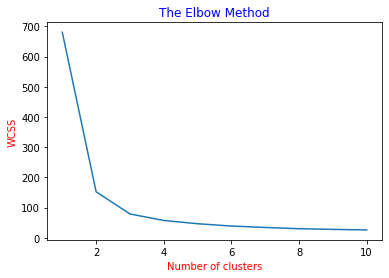

In [52]:
plt.plot(n,wcss)
plt.title("The Elbow Method",color = "blue")
plt.xlabel("Number of clusters",color = "red")
plt.ylabel("WCSS",color = "red")
plt.show()

### From the graph, We can clearly observe where the 'elbow' occurs.This is point where the within cluster sum of squares doesn't decrease rapidly.

### From this we choose optimum nmber of clusters as "3".

## Creating the KMeans Model

In [53]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(x)

In [54]:
print(y_pred)                   

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [55]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Visualization

### Visulizing the clusters on first two columns i.e sepal length and sepal width

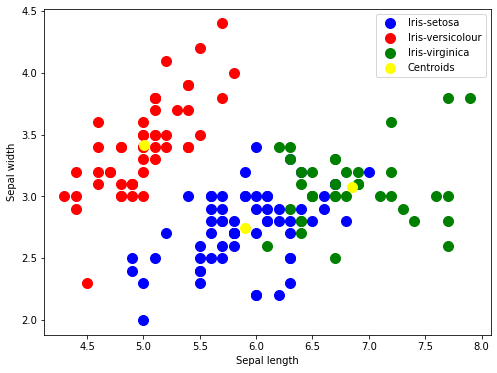

In [66]:
plt.figure(figsize=(8,6))

plt.xlabel("Sepal length",size=10,color="black")
plt.ylabel("Sepal width",size=10,color="black")

# Plotting the clusters 
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc="best")

plt.show()

### Visulizing the clusters on last two columns i.e petal length and petal width

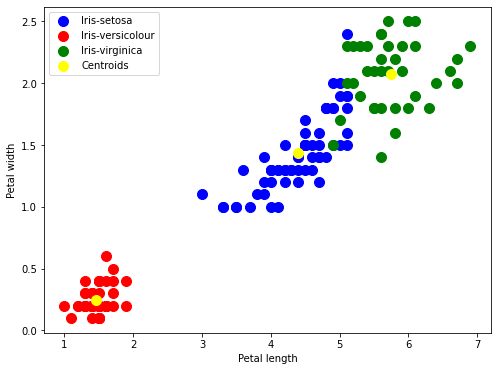

In [65]:
plt.figure(figsize=(8,6))

plt.xlabel("Petal length",size=10,color="black")
plt.ylabel("Petal width",size=10,color="black")

# Plotting the clusters 
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3],s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc="best")

plt.show()

## We found the optimum number of clusters as 3 and represented it visually. 

# Thank You !